In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import statsmodels.api as sm
import itertools
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM, GRU
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
# import tensorflow
# tensorflow.random.set_seed(1)
# from google.colab import files
# from keras.optimizers import SGD
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("COMBINED.csv")

In [3]:
df.dropna().head(5)

,Date,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
0,04-01-2000,25.55,282.7,1411.75,100.10,6.499,289.10
1,05-01-2000,24.91,281.1,1413.50,100.05,6.599,292.64
2,06-01-2000,24.78,281.4,1404.00,100.34,6.540,297.70
4,10-01-2000,24.67,281.7,1475.00,100.65,6.554,294.37
5,11-01-2000,25.77,283.4,1454.25,100.26,6.659,298.00


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.head()

,Date,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
0,2000-01-04,25.55,282.7,1411.75,100.10,6.499,289.10
1,2000-01-05,24.91,281.1,1413.50,100.05,6.599,292.64
2,2000-01-06,24.78,281.4,1404.00,100.34,6.540,297.70
3,2000-01-07,24.22,281.9,1460.50,100.50,6.513,NaN
4,2000-01-10,24.67,281.7,1475.00,100.65,6.554,294.37


In [5]:
df.set_index('Date',inplace=True)

In [6]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [8]:
adf_test(df['GOLD'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.183290
p-value                    0.680742
# lags used               12.000000
# observations          4928.000000
critical value (1%)       -3.431678
critical value (5%)       -2.862127
critical value (10%)      -2.567082
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
adf_test(df['WTI'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.004742
p-value                    0.284498
# lags used                5.000000
# observations          4941.000000
critical value (1%)       -3.431674
critical value (5%)       -2.862125
critical value (10%)      -2.567081
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
adf_test(df['SP 500'])

Augmented Dickey-Fuller Test: 
ADF test statistic         0.825767
p-value                    0.992041
# lags used               22.000000
# observations          4923.000000
critical value (1%)       -3.431679
critical value (5%)       -2.862127
critical value (10%)      -2.567083
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
adf_test(df['US DOLLAR INDEX'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.641191
p-value                    0.461638
# lags used               32.000000
# observations          4884.000000
critical value (1%)       -3.431690
critical value (5%)       -2.862132
critical value (10%)      -2.567085
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [12]:
adf_test(df['US 10YR BOND'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.394015
p-value                    0.143433
# lags used                2.000000
# observations          4917.000000
critical value (1%)       -3.431681
critical value (5%)       -2.862128
critical value (10%)      -2.567083
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
adf_test(df['DJU'])

Augmented Dickey-Fuller Test: 
ADF test statistic         0.043525
p-value                    0.961987
# lags used                9.000000
# observations          4849.000000
critical value (1%)       -3.431699
critical value (5%)       -2.862136
critical value (10%)      -2.567087
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [14]:
# train = df[:int(0.95*(len(df)))]
test_orig = df[int(0.95*(len(df))):]

In [15]:
df_difference = df.diff()

In [16]:
adf_test(df_difference['WTI'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -32.079650
p-value                    0.000000
# lags used                4.000000
# observations          4941.000000
critical value (1%)       -3.431674
critical value (5%)       -2.862125
critical value (10%)      -2.567081
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [17]:
adf_test(df_difference['GOLD'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -21.505587
p-value                    0.000000
# lags used               11.000000
# observations          4922.000000
critical value (1%)       -3.431679
critical value (5%)       -2.862127
critical value (10%)      -2.567083
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [18]:
adf_test(df_difference['SP 500'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.523056e+01
p-value                 5.328680e-28
# lags used             2.100000e+01
# observations          4.922000e+03
critical value (1%)    -3.431679e+00
critical value (5%)    -2.862127e+00
critical value (10%)   -2.567083e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [19]:
adf_test(df_difference['US 10YR BOND'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -53.117305
p-value                    0.000000
# lags used                1.000000
# observations          4890.000000
critical value (1%)       -3.431688
critical value (5%)       -2.862131
critical value (10%)      -2.567085
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [20]:
adf_test(df_difference['DJU'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -25.303575
p-value                    0.000000
# lags used                8.000000
# observations          4785.000000
critical value (1%)       -3.431717
critical value (5%)       -2.862144
critical value (10%)      -2.567092
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [21]:
adf_test(df_difference['US DOLLAR INDEX'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.504227e+01
p-value                 9.554975e-28
# lags used             2.000000e+01
# observations          4.865000e+03
critical value (1%)    -3.431695e+00
critical value (5%)    -2.862134e+00
critical value (10%)   -2.567086e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [22]:
test_obs = 248
train = df_difference[:-test_obs]
test = df_difference[-test_obs:]
#creating the train and validation set
#train = df_difference[:int(0.95*(len(df_difference)))]
#test = df_difference[int(0.95*(len(df_difference))):]

In [23]:
train.head(5)

,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
Date,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,-0.64,-1.6,1.75,-0.05,0.100,3.54
2000-01-06,-0.13,0.3,-9.50,0.29,-0.059,5.06
2000-01-07,-0.56,0.5,56.50,0.16,-0.027,NaN
2000-01-10,0.45,-0.2,14.50,0.15,0.041,NaN


In [24]:
train =train.dropna()

In [25]:
test =test.dropna()

In [26]:
test.head(5)

,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
Date,,,,,,
2018-07-06,0.86,-2.8,24.50,-0.454,-0.009,5.839966
2018-07-09,0.05,4.0,24.50,0.038,0.034,-22.440002
2018-07-10,0.26,-3.8,9.25,0.082,0.009,6.820007
2018-07-11,-3.73,-11.6,-22.75,0.597,-0.027,6.809998
2018-07-12,-0.05,1.9,24.50,0.078,0.009,0.320007


In [27]:
train.head(5)

,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
Date,,,,,,
2000-01-05,-0.64,-1.6,1.75,-0.05,0.100,3.54
2000-01-06,-0.13,0.3,-9.50,0.29,-0.059,5.06
2000-01-11,1.10,1.7,-20.75,-0.39,0.105,3.63
2000-01-12,0.51,-0.7,-12.25,0.07,0.042,1.00
2000-01-13,0.41,1.4,16.50,0.34,-0.069,3.24


In [28]:
from statsmodels.tsa.vector_ar.var_model import VAR
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  6.374825422521007
BIC:  6.434124572601891

Order = 2
AIC:  6.369012531183991
BIC:  6.479159968008945

Order = 3
AIC:  6.375940800099211
BIC:  6.536955406814859

Order = 4
AIC:  6.379281343926657
BIC:  6.591182014991741

Order = 5
AIC:  6.384195547145284
BIC:  6.6470011883399485

Order = 6
AIC:  6.393304674219037
BIC:  6.70703420265412

Order = 7
AIC:  6.396256423664727
BIC:  6.760928767791058

Order = 8
AIC:  6.398940995908092
BIC:  6.8145750955258055

Order = 9
AIC:  6.3945500351523155
BIC:  6.861164841420169

Order = 10
AIC:  6.39661919105392
BIC:  6.914233666498623

Order = 11
AIC:  6.403038041334454
BIC:  6.971671159860009

Order = 12
AIC:  6.404001908897904
BIC:  7.0236726557949565

Order = 13
AIC:  6.411938128475442
BIC:  7.082665500430637

Order = 14
AIC:  6.417118453992385
BIC:  7.138921459097736

Order = 15
AIC:  6.423529891187135
BIC:  7.196427548949403



In [29]:
result = model.fit(11)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Nov, 2022
Time:                     11:26:04
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    6.97167
Nobs:                     4539.00    HQIC:                   6.60331
Log likelihood:          -52773.1    FPE:                    603.684
AIC:                      6.40304    Det(Omega_mle):         552.875
--------------------------------------------------------------------
Results for equation WTI
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.015944         0.020972            0.760           0.447
L1.WTI                     -0.056944         0.016332           -3.487           0.000
L1.GOLD                    -0.000577  

In [30]:
lagged_Values = train.values[-12:]

In [31]:
pred = result.forecast(y=lagged_Values, steps=248) 

idx = pd.date_range('2018-07-04	', periods=248, freq='D')
df_forecast=pd.DataFrame(data=pred, index=idx, columns=['WTI_2d', "GOLD_2d", "SP500_2d", 'US_DOLLAR_INDEX_2d', 'US_10YR_BOND_2d', 'DJU_2d'])

In [32]:
df_forecast.head(5)

,WTI_2d,GOLD_2d,SP500_2d,US_DOLLAR_INDEX_2d,US_10YR_BOND_2d,DJU_2d
2018-07-04,-0.217311,1.406091,-1.553082,0.071748,0.000021,-0.668979
2018-07-05,0.217565,-1.245394,4.082694,-0.026319,0.011231,0.545909
2018-07-06,0.063444,2.661623,-1.964863,-0.025612,0.001042,-0.567500
2018-07-07,-0.258231,-0.362388,-1.485187,0.011813,-0.002564,-0.643652
2018-07-08,0.016694,-1.538484,6.201196,-0.086498,0.000178,0.742567


In [33]:
forecast_final = pd.DataFrame()

In [34]:
#WTI
df_forecast['WTI1d'] = (df['WTI'].iloc[-test_obs-1]-df['WTI'].iloc[-test_obs-2]) + df_forecast['WTI_2d'].cumsum()
forecast_final['WTIForecast'] = df['WTI'].iloc[-test_obs-1] + df_forecast['WTI1d'].cumsum()

df_forecast['GOLD1d'] = (df['GOLD'].iloc[-test_obs-1]-df['GOLD'].iloc[-test_obs-2]) + df_forecast['GOLD_2d'].cumsum()
forecast_final['GOLDForecast'] = df['GOLD'].iloc[-test_obs-1] + df_forecast['GOLD1d'].cumsum()

df_forecast['US DOLLAR INDEX1d'] = (df['US DOLLAR INDEX'].iloc[-test_obs-1]-df['US DOLLAR INDEX'].iloc[-test_obs-2]) + df_forecast['US_DOLLAR_INDEX_2d'].cumsum()
forecast_final['US DOLLAR INDEXForecast'] = df['US DOLLAR INDEX'].iloc[-test_obs-1] + df_forecast['US DOLLAR INDEX1d'].cumsum()

df_forecast['DJU1d'] = (df['DJU'].iloc[-test_obs-1]-df['DJU'].iloc[-test_obs-2]) + df_forecast['DJU_2d'].cumsum()
forecast_final['DJUForecast'] = df['DJU'].iloc[-test_obs-1] + df_forecast['DJU1d'].cumsum()

df_forecast['SP 5001d'] = (df['SP 500'].iloc[-test_obs-1]-df['SP 500'].iloc[-test_obs-2]) + df_forecast['SP500_2d'].cumsum()
forecast_final['SP 500Forecast'] = df['SP 500'].iloc[-test_obs-1] + df_forecast['SP 5001d'].cumsum()

df_forecast['US 10YR BOND1d'] = (df['US 10YR BOND'].iloc[-test_obs-1]-df['US 10YR BOND'].iloc[-test_obs-2]) + df_forecast['US_10YR_BOND_2d'].cumsum()
forecast_final['US 10YR BONDForecast'] = df['US 10YR BOND'].iloc[-test_obs-1] + df_forecast['US 10YR BOND1d'].cumsum()

# Predicting for a week

<AxesSubplot:>

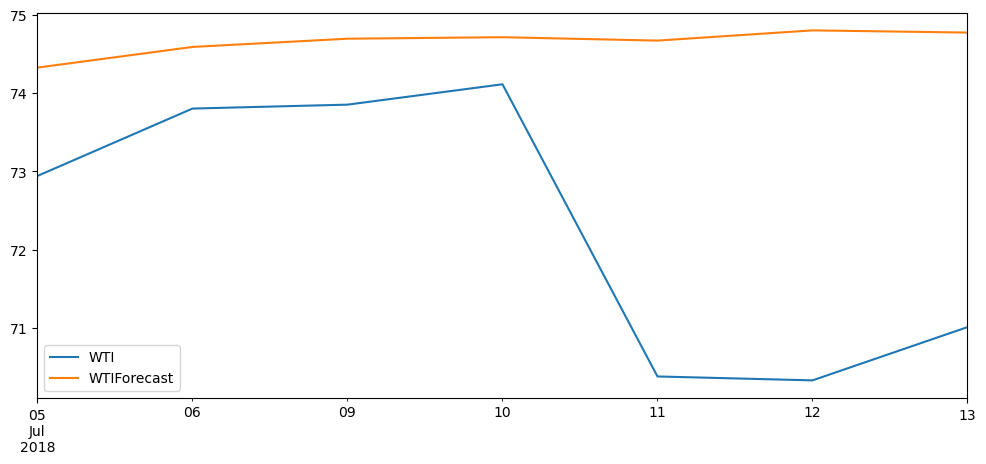

In [35]:
final = forecast_final.join(test_orig).dropna().head(7)
final['WTI'].plot(figsize=(12,5),legend=True)
final['WTIForecast'].plot(legend=True)

In [38]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(final['WTI'], final['WTIForecast'])

0.03236140465880427

# Prediction for a month

In [39]:
final = forecast_final.join(test_orig).dropna().head(30)

<AxesSubplot:>

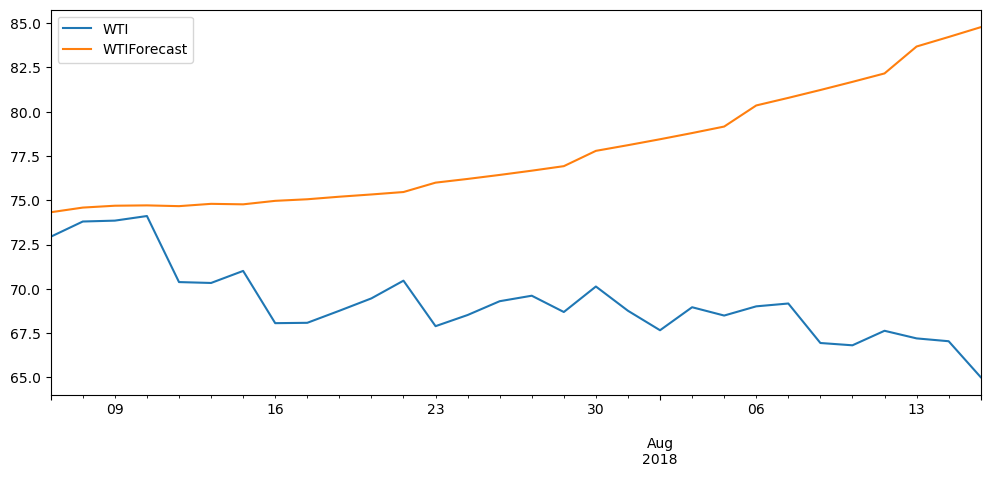

In [40]:
final['WTI'].plot(figsize=(12,5),legend=True)
final['WTIForecast'].plot(legend=True)

In [41]:
mean_absolute_percentage_error(final['WTI'], final['WTIForecast'])

0.12424104536096188

In [42]:
df.corr()

,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
WTI,1.000000,0.665941,0.083106,-0.823229,-0.405524,0.287398
GOLD,0.665941,1.000000,0.512646,-0.531812,-0.871268,0.656101
SP 500,0.083106,0.512646,1.000000,0.099504,-0.474446,0.926677
US DOLLAR INDEX,-0.823229,-0.531812,0.099504,1.000000,0.377742,-0.116609
US 10YR BOND,-0.405524,-0.871268,-0.474446,0.377742,1.000000,-0.604175
DJU,0.287398,0.656101,0.926677,-0.116609,-0.604175,1.000000


# Predicting for whole test dataset

In [43]:
final = forecast_final.join(test_orig).dropna()

<AxesSubplot:>

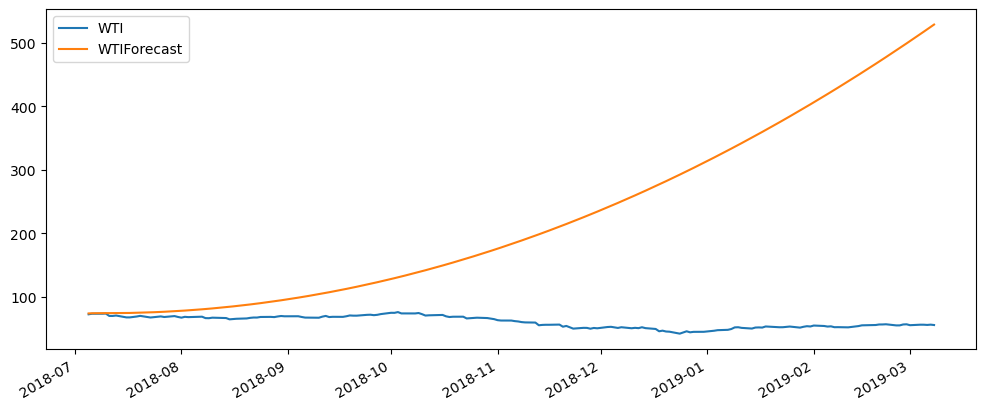

In [45]:
final['WTI'].plot(figsize=(12,5),legend=True)
final['WTIForecast'].plot(legend=True)

In [46]:
mean_absolute_percentage_error(final['WTI'], final['WTIForecast'])

2.947817731783184